# Исследование объявлений о продаже квартир

# Описание проекта

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Цели и задачи

1. Предобработка данных
    - Определить и изучить пропущенные значения
    - Приведите данные к нужным типам
2. Посчитать и добавить в таблицу
    - цену квадратного метра
    - день недели, месяц и год публикации объявления
    - этаж квартиры; варианты — первый, последний, другой
    - соотношение жилой и общей площади, а также отношение площади кухни к общей
3. Провести исследовательский анализ данных
    - Изучить следующие параметры: площадь, цена, число комнат, высота потолков
    - Изучить время продажи квартиры. Построить гистограмму. Посчитать среднее и медиану. 
    - Убрать редкие и выбивающиеся значения
    - Изучить какие факторы больше всего влияют на стоимость квартиры (площади, числа комнат, удалённости от центра, на каком этаже расположена квартира, зависимость от даты размещения: дня недели, месяца и года)
    - Посчитать среднюю цену квадратного метра в топ-10 населённых пунктов по числу объявлений
    - Выяснить, какая область входит в центр
    - Проанализировать эту территорию и изучить следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделать выводы, отличаются ли они от общих выводов по всей базе.

# Описание данных

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Что-обнаружено" data-toc-modified-id="Что-обнаружено-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Что обнаружено</a></span></li><li><span><a href="#С-чем-может-быть-связано" data-toc-modified-id="С-чем-может-быть-связано-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>С чем может быть связано</a></span><ul class="toc-item"><li><span><a href="#План-предобработки:" data-toc-modified-id="План-предобработки:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>План предобработки:</a></span></li><li><span><a href="#План-замены-пропусков.-(таблица-1.)" data-toc-modified-id="План-замены-пропусков.-(таблица-1.)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>План замены пропусков. (таблица 1.)</a></span></li><li><span><a href="#План-замены-типов-данных" data-toc-modified-id="План-замены-типов-данных-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>План замены типов данных</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Поиск-дубликатов" data-toc-modified-id="Поиск-дубликатов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Поиск дубликатов</a></span></li><li><span><a href="#Заменена-значений-в-соответствии-с-таблицей-2" data-toc-modified-id="Заменена-значений-в-соответствии-с-таблицей-2-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Заменена значений в соответствии с таблицей 2</a></span></li><li><span><a href="#Замена-пропусков-для-столбцов-'total_area',-'living_area',-'kitchen_area',-'rooms',-'studio'" data-toc-modified-id="Замена-пропусков-для-столбцов-'total_area',-'living_area',-'kitchen_area',-'rooms',-'studio'-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Замена пропусков для столбцов 'total_area', 'living_area', 'kitchen_area', 'rooms', 'studio'</a></span></li><li><span><a href="#Замена-пропусков--для-столбцов:-'airports_nearest',-'cityCenters_nearest',-'parks_around3000',-'ponds_nearest',-'ponds_around3000',-'ponds_nearest'" data-toc-modified-id="Замена-пропусков--для-столбцов:-'airports_nearest',-'cityCenters_nearest',-'parks_around3000',-'ponds_nearest',-'ponds_around3000',-'ponds_nearest'-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Замена пропусков  для столбцов: 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'ponds_nearest', 'ponds_around3000', 'ponds_nearest'</a></span></li><li><span><a href="#Замена-типов-данных" data-toc-modified-id="Замена-типов-данных-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Замена типов данных</a></span></li><li><span><a href="#Проверка-замены-типов" data-toc-modified-id="Проверка-замены-типов-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Проверка замены типов</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Цена-квадратного-метра" data-toc-modified-id="Цена-квадратного-метра-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Цена квадратного метра</a></span></li><li><span><a href="#День-недели,-месяц-и-год-публикации-объявления" data-toc-modified-id="День-недели,-месяц-и-год-публикации-объявления-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>День недели, месяц и год публикации объявления</a></span></li><li><span><a href="#Тип-этажа-квартиры" data-toc-modified-id="Тип-этажа-квартиры-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Тип этажа квартиры</a></span></li><li><span><a href="#Cоотношение-жилой-и-общей-площади,-а-также-отношение-площади-кухни-к-общей" data-toc-modified-id="Cоотношение-жилой-и-общей-площади,-а-также-отношение-площади-кухни-к-общей-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Cоотношение жилой и общей площади, а также отношение площади кухни к общей</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Площадь,-цена,-число-комнат,-высота-потолков.-Гистограммы-для-каждого-параметра" data-toc-modified-id="Площадь,-цена,-число-комнат,-высота-потолков.-Гистограммы-для-каждого-параметра-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Площадь, цена, число комнат, высота потолков. Гистограммы для каждого параметра</a></span></li><li><span><a href="#Время-продажи-квартиры" data-toc-modified-id="Время-продажи-квартиры-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Время продажи квартиры</a></span><ul class="toc-item"><li><span><a href="#Уберем-редкие-выбивающиеся-значения" data-toc-modified-id="Уберем-редкие-выбивающиеся-значения-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Уберем редкие выбивающиеся значения</a></span><ul class="toc-item"><li><span><a href="#Время-продажи-квартиры" data-toc-modified-id="Время-продажи-квартиры-6.2.1.1"><span class="toc-item-num">6.2.1.1&nbsp;&nbsp;</span>Время продажи квартиры</a></span></li><li><span><a href="#Распределение-площади-квартир" data-toc-modified-id="Распределение-площади-квартир-6.2.1.2"><span class="toc-item-num">6.2.1.2&nbsp;&nbsp;</span>Распределение площади квартир</a></span></li><li><span><a href="#Распределение-высоты-потолков" data-toc-modified-id="Распределение-высоты-потолков-6.2.1.3"><span class="toc-item-num">6.2.1.3&nbsp;&nbsp;</span>Распределение высоты потолков</a></span></li><li><span><a href="#Распределение-цены" data-toc-modified-id="Распределение-цены-6.2.1.4"><span class="toc-item-num">6.2.1.4&nbsp;&nbsp;</span>Распределение цены</a></span></li></ul></li></ul></li><li><span><a href="#Факторы,-больше-всего-влияющие-на-стоимость-квартиры" data-toc-modified-id="Факторы,-больше-всего-влияющие-на-стоимость-квартиры-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Факторы, больше всего влияющие на стоимость квартиры</a></span><ul class="toc-item"><li><span><a href="#Зависимость-цены-от-площади" data-toc-modified-id="Зависимость-цены-от-площади-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Зависимость цены от площади</a></span></li><li><span><a href="#Зависимость-цены-от-количества-комнат" data-toc-modified-id="Зависимость-цены-от-количества-комнат-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>Зависимость цены от количества комнат</a></span></li><li><span><a href="#Зависимость-цены-от-удаленности-от-центра" data-toc-modified-id="Зависимость-цены-от-удаленности-от-центра-6.3.3"><span class="toc-item-num">6.3.3&nbsp;&nbsp;</span>Зависимость цены от удаленности от центра</a></span></li></ul></li><li><span><a href="#Зависимость-цены-от-того,-на-каком-этаже-расположена-квартира" data-toc-modified-id="Зависимость-цены-от-того,-на-каком-этаже-расположена-квартира-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Зависимость цены от того, на каком этаже расположена квартира</a></span></li><li><span><a href="#Зависимость-цены-от-того,-на-каком-этаже-расположена-квартира" data-toc-modified-id="Зависимость-цены-от-того,-на-каком-этаже-расположена-квартира-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Зависимость цены от того, на каком этаже расположена квартира</a></span></li><li><span><a href="#Зависимость-цены-от-дня-недели-размещения" data-toc-modified-id="Зависимость-цены-от-дня-недели-размещения-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Зависимость цены от дня недели размещения</a></span></li><li><span><a href="#Зависимость-цены-от-месяца-размещения" data-toc-modified-id="Зависимость-цены-от-месяца-размещения-6.7"><span class="toc-item-num">6.7&nbsp;&nbsp;</span>Зависимость цены от месяца размещения</a></span></li><li><span><a href="#Зависимость-цены-от-года-размещения" data-toc-modified-id="Зависимость-цены-от-года-размещения-6.8"><span class="toc-item-num">6.8&nbsp;&nbsp;</span>Зависимость цены от года размещения</a></span></li><li><span><a href="#Изменение-цены-в-течение-2019-года" data-toc-modified-id="Изменение-цены-в-течение-2019-года-6.9"><span class="toc-item-num">6.9&nbsp;&nbsp;</span>Изменение цены в течение 2019 года</a></span></li></ul></li><li><span><a href="#10-населённых-пунктов-с-наибольшим-числом-объявлений" data-toc-modified-id="10-населённых-пунктов-с-наибольшим-числом-объявлений-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>10 населённых пунктов с наибольшим числом объявлений</a></span><ul class="toc-item"><li><span><a href="#Предложения-квартир-в-Центре" data-toc-modified-id="Предложения-квартир-в-Центре-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Предложения квартир в Центре</a></span></li><li><span><a href="#Анализ-влияния-на-цену-числа-комнат,-этажа,-удалённости-от-центра,-даты-размещения-объявления." data-toc-modified-id="Анализ-влияния-на-цену-числа-комнат,-этажа,-удалённости-от-центра,-даты-размещения-объявления.-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Анализ влияния на цену числа комнат, этажа, удалённости от центра, даты размещения объявления.</a></span><ul class="toc-item"><li><span><a href="#Зависимость-цены-от-площади" data-toc-modified-id="Зависимость-цены-от-площади-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>Зависимость цены от площади</a></span></li><li><span><a href="#Зависимость-цены-от-количества-комнат" data-toc-modified-id="Зависимость-цены-от-количества-комнат-7.2.2"><span class="toc-item-num">7.2.2&nbsp;&nbsp;</span>Зависимость цены от количества комнат</a></span></li><li><span><a href="#Зависимость-цены-от-удаленности-от-центра" data-toc-modified-id="Зависимость-цены-от-удаленности-от-центра-7.2.3"><span class="toc-item-num">7.2.3&nbsp;&nbsp;</span>Зависимость цены от удаленности от центра</a></span></li></ul></li><li><span><a href="#Зависимость-цены-от-того,-на-каком-этаже-расположена-квартира" data-toc-modified-id="Зависимость-цены-от-того,-на-каком-этаже-расположена-квартира-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Зависимость цены от того, на каком этаже расположена квартира</a></span></li><li><span><a href="#Зависимость-цены-от-того,-на-каком-этаже-расположена-квартира" data-toc-modified-id="Зависимость-цены-от-того,-на-каком-этаже-расположена-квартира-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Зависимость цены от того, на каком этаже расположена квартира</a></span></li><li><span><a href="#Зависимость-цены-от-того-дня-недели-размещения" data-toc-modified-id="Зависимость-цены-от-того-дня-недели-размещения-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Зависимость цены от того дня недели размещения</a></span></li><li><span><a href="#Зависимость-цены-от-месяца-размещения" data-toc-modified-id="Зависимость-цены-от-месяца-размещения-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>Зависимость цены от месяца размещения</a></span></li><li><span><a href="#Зависимость-цены-от-года-размещения" data-toc-modified-id="Зависимость-цены-от-года-размещения-7.7"><span class="toc-item-num">7.7&nbsp;&nbsp;</span>Зависимость цены от года размещения</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Изучение данных из файла

In [1]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
#pd.options.display.max_rows = None
import numpy as np
import os
import seaborn as sns
file = 'real_estate_data.csv'
if os.path.exists(file):
    df = pd.read_csv('real_estate_data.csv', sep='\t')
else:
    print('file not found')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

посмотрим на типы данных и количество пропусков

Посмотрим на описание данных. Обратим внимание на минимальные и максимальные значения.

In [3]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [4]:
# посмотрим на значения площадей для случаев, когда living_area < 8 
print(df.loc[(df['living_area']<8), ['total_area', 'living_area', 'kitchen_area', 'rooms', 'studio']])
print('выглядит как ошибка ввода данных. Хороший пример - последняя строка')

       total_area  living_area  kitchen_area  rooms  studio
3242         41.0          3.0          11.0      1   False
13915        52.0          2.0           9.0      2   False
16431        31.0          6.0          17.0      1   False
17582        22.0          5.0           NaN      0    True
19251        33.0          6.5          18.0      1   False
21758        23.0          2.0           NaN      0    True
21943        77.6          5.4           9.8      4   False
23574       139.0          3.0          16.0      3   False
выглядит как ошибка ввода данных. Хороший пример - последняя строка


## Что обнаружено 
1. Значения некоторых параметров явно занижены или ошибочны, так, например, высота потолка (ceiling_height) 1 м явно занижено, а 100 - завышено. То же самое встречается для жидая площадь (living_area) и площадь кухни (kitchen_area )
2. занчения для парметра balcony бывает отсутствуют, и вероятно это значит что их нет, поэтому заменим на 0. (если бы они были, то, вероятно, их число было бы указано)
3. Для параметра "Название населённого пункта" (locality_name) так же встречаются пропуски, заменим их самым популярным значением - "Санкт-Петербург"
2. для некоторых населенных пунктов значения для параметров 'airports_nearest','cityCenters_nearest','parks_around3000','ponds_nearest','ponds_around3000','ponds_nearest' отсутстввуют полностью что логично т.к. если, например, аэропорт совсем далеко, то уже не важно на каком он расстоянии. С другой стороны для населенных пунктов, где все таки медиану можно посчитать пропуски все равно присутствуют и их лучше заменить на мединау в соответствии со значением для данного населенного пункта.
2. Значения для days_exposition просто заменим на медиану.
## С чем может быть связано
* Пропуски могут быть связаны с необязательностью заполнения полей и/или тем что данные объединены из разных источников, где разные требования

### План предобработки:

1. Удалить дубликаты (при наличии). Оценить изменения.
2. Удалить пустые строки (при наличии). Оценить изменения.
3. Заменить значения в соответствии с таблицей 1.
4. Изменить тип данных (см. таб. 2) (т.к. после замены в некоторых столбцах уйдут  пропуски и можно их сделать типа int, а текстовые - типа 'category' )

### План замены пропусков. (таблица 1.) 

|параметр|Действия|Каким занчением заменять|
|--|--|--|
|ceiling_height|ограничить максимальное (100) и минимальное (1) до разменого значения. Сделаем min=2.4 и max=5 м.|median|
|floors_total|замена на медиану                                                                        |median|
|living_area|для каждого кол-ва комнат посчитаем медиану отношения living_area/total_area и потом для каждого значения кол-ва комнат через этот коэффициент высчитаем искомое значение. так же поступим и для значений меньше 5 м                      |median|
|is_apartment|не требуется, т.к. если пропущено, то значит нет.                                                                   |нет|
|kitchen_area|для каждого кол-ва комнат посчитаем медиану отношения kitchen_area/total_area и потом для каждого значения кол-ва комнат через этот коэффициент высчитаем искомое значение. Минимальное значение (2) изменять не будем. ну вдраг и правда бывают кухни по 2 м. уголок такой под плиту и холодильник                |median|
|balcony|замена                                                                    |0|
|locality_name|замена (на самое популярное значение                                                                    |Санкт-Петербург|)
|airports_nearest|для каждого locality_name посчитать медиану и заполнить NaN в соответствии с полученным значением. если медианы нет - оставить NaN    |median/NaN|
|cityCenters_nearest|для каждого locality_name посчитать медиану и заполнить NaN в соответствии с полученным значением. если медианы нет - оставить NaN |median/NaN|
|parks_around3000|для каждого locality_name посчитать медиану и заполнить NaN в соответствии с полученным значением. если медианы нет - оставить NaN    |median/NaN|
|ponds_nearest|для каждого locality_name посчитать медиану и заполнить NaN в соответствии с полученным значением. если медианы нет - оставить NaN       |median/NaN|
|ponds_around3000|для каждого locality_name посчитать медиану и заполнить NaN в соответствии с полученным значением. если медианы нет - оставить NaN    |median/NaN|
|ponds_nearest|для каждого locality_name посчитать медиану и заполнить NaN в соответствии с полученным значением. если медианы нет - оставить NaN       |median/NaN|
|days_exposition|замена на медиану                                                                  |median|


### План замены типов данных

Значения для замены типа выбраны исходя из требований
1. минимазации объема занимаемой памяти при сохранении исходного значения, т.к. у каждого типа есть свои максимально - возможные значения.
2. возможность применения типа к данному параметру (если в столбце есть NaN то тип int уже не подходит)
3. тип object - самый не экономичный тип данных. в нашем случае его можно или заменить на category или на datetime, что очень удобно, т.к. дает очень большую экономию

Таблица 2. План замены типов данных

|параметр|Non-Null|исходный тип | необходимый тип| комментарий | 
|--|--|--|--|--|
|total_images        |23699|  int64|         uint8|  |
|last_price          |23699|float64|         int32|  |
|total_area          |23699|float64|         int16|  |
|first_day_exposition|23699| object|datetime64[ns]|  |
|rooms               |23699|  int64|         uint8|  |
|ceiling_height      |23699|float64|       float32|  |
|floors_total        |23613|float64|       float16|  |
|living_area         |21796|float64|       float16|  |
|floor               |23699|  int64|         uint8|  |
|is_apartment        |23699| object|          bool|  |
|studio              |23699|   bool|          bool|  |
|open_plan           |23699|   bool|          bool|  |
|kitchen_area        |21421|float64|       float32|  |
|balcony             |23699|float64|         uint8|  |
|locality_name       |23699| object|      category|  |
|airports_nearest    |18157|float64|       float32|  |
|cityCenters_nearest |18180|float64|       float64|  |
|parks_around3000    |18181|float64|       float16|  |
|parks_nearest       |8079 |float64|       float64|  |
|ponds_around3000    |18181|float64|       float32|  |
|ponds_nearest       |9110 |float64|       float16|  |
|days_exposition     |23699|float64|         int16|  |

## Предобработка данных

### Поиск дубликатов

In [5]:
print('количество дуплакатов = ', df.duplicated().sum())

количество дуплакатов =  0


### Заменена значений в соответствии с таблицей 2

In [6]:
#df.loc[(df['ceiling_height']>5), ['ceiling_height']] = 5 # резервный ваприант
df['ceiling_height_cutted'] = df['ceiling_height'].where((df['ceiling_height']<10),10)
df['ceiling_height_cutted'] = df['ceiling_height_cutted'].where((df['ceiling_height_cutted']>1.0),1.0)
df['ceiling_height_cutted'] = df['ceiling_height_cutted'].fillna(df['ceiling_height_cutted'].median())
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

df['balcony'] = df['balcony'].fillna(0) 
df['locality_name'] = df['locality_name'].fillna('Санкт-Петербург')
df['days_exposition'] = df['days_exposition'].fillna(df['days_exposition'].median())

### Замена пропусков для столбцов 'total_area', 'living_area', 'kitchen_area', 'rooms', 'studio'

In [7]:
# посмотрим на разбивку до преобразования
display(df.loc[:,['total_area', 'living_area', 'kitchen_area', 'rooms', 'studio']].groupby(['studio','rooms',]).agg(['count','median']))

total_area         living_area          kitchen_area        
                  count  median       count   median        count  median
studio rooms                                                             
False  0             59   26.10          55   18.000            0     NaN
       1           8036   36.60        7377   17.600         7213    9.04
       2           7940   53.00        7296   30.500         7286    8.80
       3           5814   73.00        5366   45.000         5380    9.50
       4           1180   99.30        1089   63.600         1081   11.10
       5            326  146.45         292   91.785          285   15.10
       6            105  184.30          99  123.900           97   19.50
       7             59  214.00          53  145.000           52   20.00
       8             12  235.70          12  161.000            9   25.00
       9              8  300.95           7  179.200            7   14.30
       10             3  272.60           3  161.400            3   19.80
       11             2  188.90           2  133.900            2   12.60
       12             1  900.00           1  409.700            1  112.00
       14             2  304.20           2  195.150            2   21.25
       15             1  590.00           1  409.000            1  100.00
       16             1  270.00           1  180.000            1   13.00
       19             1  374.60           1  264.500            1   27.60
True   0            138   26.00         128   18.000            0     NaN
       1             11   27.00          11   18.000            0     NaN

In [8]:
# расчет. для НЕ студий


# заменим значения living_area меньше чем 8 м на NaN, чтоб потом пересчитать на адекватное

df['living_area'] = df['living_area'].where((df['living_area']>=8),np.NaN) 

print('предварительно посчитаем сколько записей было в датасете, если не студия и ПЛОЩАДЬ КУХНИ БОЛЬШЕ ЧЕМ ЖИЛАЯ ПЛОЩАДЬ. ответ:',
      len(df.loc[(~df['studio']) & ((df['living_area'] < (df['kitchen_area'] ))) ,['total_area', 'living_area', 'kitchen_area'] ]))
        #len(df.loc[(~df['studio']) & ((df['total_area'] < (df['living_area'] + df['kitchen_area']))) ,['total_area', 'living_area', 'kitchen_area'] ])) ------здесь старое значение

# записи с неизвестным значением kitchen_area и living_area и не студии. всего 1454 шт.
print('всего записей с неизвестным значением kitchen_area и living_area и чтоб не студия (до запонения пропусков):',
      len(df[(~df['studio']) & (df['kitchen_area']).isna() | (df['living_area']).isna()]))

df['kitchen_to_total_area'] = np.NaN
df['living_to_total_area'] = np.NaN
# для не студий посчитаем отношение площади кухни к общей площади
df.loc[~df['studio'], 'kitchen_to_total_area'] = df.loc[~df['studio'], 'kitchen_area'] / df.loc[~df['studio'],'total_area']
# для не студий посчитаем отношение жилой площади к общей площади
df.loc[~df['studio'], 'living_to_total_area'] = df.loc[~df['studio'], 'living_area'] / df.loc[~df['studio'],'total_area']

kitchen_to_total_area_medians =  df[~df['studio']].groupby('rooms')['kitchen_to_total_area'].median()
living_to_total_area_medians =  df[~df['studio']].groupby('rooms')['living_to_total_area'].median()
# для каждого значения количества комнат (для не студий)
for rooms_amount in kitchen_to_total_area_medians.index: 
    # посчитаем медианное значение отношения площади кухни к полной площади (для нестудий)
    median_kitchen_to_total_area_rate = kitchen_to_total_area_medians[rooms_amount]
    # и присвоим пропущенному значению площади кухни рассчитанную медиану (все так же - для нестудий)
    df.loc[(~df['studio']) & (df['kitchen_area'].isna()) & (df['rooms']==rooms_amount), 'kitchen_area'] =\
    df.loc[(~df['studio']) & (df['kitchen_area'].isna()) & (df['rooms']==rooms_amount), 'total_area'] * median_kitchen_to_total_area_rate
    
    
    # для нестудий посчитаем медианное значение отношения жилой площади к полной площади (для не студий)
    median_living_to_total_area_rate = living_to_total_area_medians[rooms_amount]
    # и присвоим пропущенному значению жилой площади рассчитанную медиану (да, да, все так же для нестудий )
    df.loc[(~df['studio']) & (df['living_area'].isna()) & (df['rooms']==rooms_amount), 'living_area'] =\
    df.loc[(~df['studio']) & (df['living_area'].isna()) & (df['rooms']==rooms_amount), 'total_area'] * median_living_to_total_area_rate

    
df = df.drop(['kitchen_to_total_area', 'living_to_total_area'], axis = 1 )
    
print('всего записей с неизвестным значением kitchen_area или living_area и чтоб не студия (после заполнения пропусков):',
      len(df[(~df['studio']) & (df['kitchen_area'].isna() | df['living_area'].isna())]))    

print('из них значение kitchen_area отсутствует, но living_area существут',
     len(df.loc[(~df['studio']) & (df['kitchen_area'].isna()) & (~df['living_area'].isna()), ['total_area' , 'living_area', 'kitchen_area', 'rooms', 'studio']]))

print('из них значение kitchen_area присутствует, но living_area отсутствует',
     len(df.loc[(~df['studio']) & (~df['kitchen_area'].isna()) & (df['living_area'].isna()), ['total_area' , 'living_area', 'kitchen_area', 'rooms', 'studio']]))

print('посчитаем еще раз (для проверки, на всякий случай) сколько значений стало в данных, если для не студия и ПЛОЩАДЬ КУХНИ БОЛЬШЕ ЧЕМ ЖИЛАЯ ПЛОЩАДЬ. ответ:',
      len(df.loc[(~df['studio']) & ((df['living_area'] < (df['kitchen_area'] ))) ,['total_area', 'living_area', 'kitchen_area'] ]))
    #len(df.loc[(~df['studio']) & ((df['total_area'] < (df['living_area'] + df['kitchen_area']))) ,['total_area', 'living_area', 'kitchen_area'] ])) ---- ТАК БЫЛО

предварительно посчитаем сколько записей было в датасете, если не студия и ПЛОЩАДЬ КУХНИ БОЛЬШЕ ЧЕМ ЖИЛАЯ ПЛОЩАДЬ. ответ: 349
всего записей с неизвестным значением kitchen_area и living_area и чтоб не студия (до запонения пропусков): 2586
всего записей с неизвестным значением kitchen_area или living_area и чтоб не студия (после заполнения пропусков): 59
из них значение kitchen_area отсутствует, но living_area существут 59
из них значение kitchen_area присутствует, но living_area отсутствует 0
посчитаем еще раз (для проверки, на всякий случай) сколько значений стало в данных, если для не студия и ПЛОЩАДЬ КУХНИ БОЛЬШЕ ЧЕМ ЖИЛАЯ ПЛОЩАДЬ. ответ: 353


**вывод** - новых несоответствующих по соотношению площадей данных (где жилая площадь меньше кухни) увеличилось на ((353-349)/349)*100 = 1,14%. Что, с учетном изначального присутствия таких записей, можно считать допуститимым.

In [9]:
# расчет. для студий

print('посчитаем первый раз сколько записей было в датасете, если тип - студия и сумма площади кухни и жилой площади БОЛЬШЕ чем общая площадь',
      len(df.loc[(df['studio']) & ((df['total_area'] < (df['living_area'] ))) ,['total_area', 'living_area', 'kitchen_area'] ]))


living_area_median_for_studio = df[df['studio']].groupby('rooms')['living_area'].median()
kitchen_area_median_for_studio = df[df['studio']].groupby('rooms')['kitchen_area'].median()
# для каждого значения количества комнат (теперь уже для студий)
for rooms_amount in kitchen_area_median_for_studio.index: 
    # посчитаем медиану жилой площадиb
    living_area_median = living_area_median_for_studio[rooms_amount]
    # и присвоим пропущенному значению жилойплощади мелиану
    df.loc[(df['studio']) & (df['living_area'].isna()) & (df['rooms']==rooms_amount), 'living_area'] = living_area_median
    
    # то же самое для площади кухни
    # посчитаем медиану  площади кухни
    kitchen_area_median = kitchen_area_median_for_studio[rooms_amount]
    # и присвоим пропущенному значению площади кухни мелиану
    df.loc[(df['studio']) & (df['kitchen_area'].isna()) & (df['rooms']==rooms_amount), 'kitchen_area'] = kitchen_area_median    
    

    
print('всего записей с неизвестным значением kitchen_area или living_area и если студия (после заполнения пропусков):', 
      len(df[(df['studio']) & (df['kitchen_area'].isna() | df['living_area']).isna()]))      

print('из них  записей с НЕизвестным значением kitchen_area но известным living_area и если студия (после заполнения пропусков):', 
      len(df[df['studio'] & df['kitchen_area'].isna() & ~df['living_area'].isna()]))      

print('из них  записей с известным значением kitchen_area но НЕизвестным living_area и если студия (после заполнения пропусков):', 
      len(df[(df['studio']) & (~df['kitchen_area'].isna() & df['living_area']).isna()]))      

print('посчитаем еще раз сколько записей было в датасете, если тип - студия и сумма площади кухни и жилой площади БОЛЬШЕ чем общая площадь',
      len(df.loc[(df['studio']) & ((df['total_area'] < (df['living_area'] ))) ,['total_area', 'living_area', 'kitchen_area'] ]))

посчитаем первый раз сколько записей было в датасете, если тип - студия и сумма площади кухни и жилой площади БОЛЬШЕ чем общая площадь 0
всего записей с неизвестным значением kitchen_area или living_area и если студия (после заполнения пропусков): 0
из них  записей с НЕизвестным значением kitchen_area но известным living_area и если студия (после заполнения пропусков): 149
из них  записей с известным значением kitchen_area но НЕизвестным living_area и если студия (после заполнения пропусков): 0
посчитаем еще раз сколько записей было в датасете, если тип - студия и сумма площади кухни и жилой площади БОЛЬШЕ чем общая площадь 0


In [10]:
# посмотрим еще раз на разбивку 
display(df.loc[:,['total_area', 'living_area', 'kitchen_area', 'rooms', 'studio']].groupby(['studio','rooms',]).agg(['count']).reset_index())

,studio,rooms,total_area,living_area,kitchen_area
,,,count,count,count
0,False,0,59,59,0
1,False,1,8036,8036,8036
2,False,2,7940,7940,7940
3,False,3,5814,5814,5814
4,False,4,1180,1180,1180
5,False,5,326,326,326
6,False,6,105,105,105
7,False,7,59,59,59
8,False,8,12,12,12


**анализ прведенной замены пропусков:** Что сейчас в таблице есть и является ли это приемлемым

- строка 1: 59 записей где НЕ студия и 0 комнат  - видимо что-то вроде хостела или общежития
- строка 18: 138 записей где   студия и 0 комнат  - норм, т.к. ну какая кухня в студии?
- строка 19: 11 записей где   студия и 1 комната  - тоже норм, т.к. во первых ну какая кухня в студии, а комнат то указано то нет - это или особенности исходных данных или планировки. приводить к единому виду - не будем"

In [11]:
# посмотрим еще раз на описание данных.
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_cutted
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23613.000000,23699.000000,23699.000000,23491.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,23699.000000,23699.00000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.724358,10.673824,34.702306,5.892358,10.491442,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,169.360226,5.55713
std,5.682529,1.088701e+07,35.654083,1.078405,0.988298,6.597173,22.832617,4.885249,5.804076,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,206.535633,3.55283
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,6.271180,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.00000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.700000,2.000000,7.100000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000,2.60000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.040000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000,2.95000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.400000,8.000000,11.800000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,199.000000,10.00000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,430.133948,33.000000,122.457061,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,10.00000


### Замена пропусков  для столбцов: 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'ponds_nearest', 'ponds_around3000', 'ponds_nearest'

In [12]:
medians_df = pd.DataFrame()
# получим новый датафрейм из медиан соответствующих значений по каждому из населенных пунктов
list_of_neigborhood_params = ['airports_nearest','cityCenters_nearest','parks_around3000','parks_nearest','ponds_around3000','ponds_nearest']

for param in list_of_neigborhood_params:
    medians_df[param] = df.groupby('locality_name')[param].agg('median')
    
# сохраним в список названия населенных пунктов, где есть непустые значения
list_of_localitys_with_not_nan_vals = medians_df.dropna().index
print(list_of_localitys_with_not_nan_vals)
print()
display(medians_df.loc[list_of_localitys_with_not_nan_vals,list_of_neigborhood_params].head())

Index(['Зеленогорск', 'Колпино', 'Красное Село', 'Кронштадт', 'Ломоносов',
       'Павловск', 'Петергоф', 'Пушкин', 'Санкт-Петербург', 'Сестрорецк',
       'посёлок Парголово', 'посёлок Стрельна'],
      dtype='object', name='locality_name')



,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
locality_name,,,,,,
Зеленогорск,72282.0,53381.0,3.0,147.5,1.0,507.0
Колпино,26232.0,32018.0,0.0,393.0,1.0,509.0
Красное Село,25715.5,29140.5,0.0,428.5,0.0,225.5
Кронштадт,67850.0,49575.0,2.0,293.0,2.0,312.0
Ломоносов,48415.5,51677.0,0.0,407.0,1.0,553.0


**видно что**
1. Есть населенные пункты, для которых возмжно расчитать медианное значение для параметров 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'ponds_nearest', 'ponds_around3000', 'ponds_nearest', но так же есть населенные пункты, где для них только пустые значения. что логично, например если в поседке нет водоемов, но они не будут указаны для всех домов данного мета. Если аэропорт достаточно дале, нет смысла указать до него расстояние. 
2. Есть населенные пункты где, достаточно много парков, прудов и для них можно рассчитать медианное значение и поставить его в пропуски в пределах данного населенного пункта.

что мы и сделаем

In [13]:
# для каждого населенного пункта для которого есть рассчитанная медиана для каждого параметра из списка list_of_neigborhood_params (спсиок окружения) 
# получим медиану и заполним ей пропуски
for locality_name  in list_of_localitys_with_not_nan_vals:
    for neigborhood_param in list_of_neigborhood_params:
        # посчитаем медиану жилой площади
        median = medians_df.loc[locality_name,neigborhood_param]
        # и присвоим пропущенному значению жилойплощади мелиану
        df.loc[(df['locality_name']==locality_name) & (df[neigborhood_param].isna()) , neigborhood_param] = median

### Замена типов данных

In [14]:
df_after = df.copy()

#'locality_name':'category',
types_dict = {'total_images':np.uint8, 'last_price':np.int32, 'total_area':np.int16,  'rooms':np.uint8 , 'ceiling_height':np.float32 , 
              'floors_total':np.float32 , 'living_area':np.float32 , 'floor':np.uint8 , 'is_apartment':np.bool, 'studio':np.bool, 'kitchen_area':np.float32 , 
              'balcony':np.uint8 ,  'airports_nearest':np.float32, 'parks_around3000':np.float16 ,  'ponds_around3000':np.float32 , 'ponds_nearest':np.float64 ,
              'days_exposition':np.int16, }

for col, typ in types_dict.items():
    #print(f'col={col}, typ={typ} ')
    df_after[col] = df_after[col].astype(typ)

df_after['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

usage_mb_before = df.memory_usage(deep=True).sum()/ 1024 ** 2
print("было : {:03.2f} MB".format(usage_mb_before))

usage_mb_after = df_after.memory_usage(deep=True).sum()/ 1024 ** 2
print("cтало : {:03.2f} MB".format(usage_mb_after))

print()

было : 8.88 MB
cтало : 4.97 MB



### Проверка замены типов

Выполним проверку. не измениись ли значения. Оценим визуально значения среднего и медианы для исходного датафрейма и после обработки

In [15]:
stat_df = pd.DataFrame(index = df.columns)
for index in stat_df.index:
    if is_numeric_dtype(df[index]) & is_numeric_dtype(df_after[index]):
        stat_df.loc[index, 'median_before'] = df[index].median()
        stat_df.loc[index, 'mean_before'] = df[index].mean()
        
        stat_df.loc[index, 'median_after'] = df_after[index].median()
        stat_df.loc[index, 'mean_after'] = df_after[index].mean()
display(stat_df[(stat_df['median_before']!=stat_df['median_after']) | (pd.to_numeric(stat_df['mean_before'])  != pd.to_numeric(stat_df['mean_after'])) ])

,median_before,mean_before,median_after,mean_after
total_area,52.00,60.348651,52.00,60.120511
first_day_exposition,NaN,NaN,NaN,NaN
ceiling_height,2.65,2.724358,2.65,2.724142
floors_total,9.00,10.673824,9.00,10.673823
living_area,30.00,34.702306,30.00,34.702190
is_apartment,NaN,NaN,NaN,NaN
kitchen_area,9.04,10.491442,9.04,10.491416
locality_name,NaN,NaN,NaN,NaN
airports_nearest,26726.00,28785.875240,26726.00,28785.849609
parks_around3000,0.00,0.609039,0.00,0.609375


как видно при автоматической сверке иногда можно увидеть расходления в значениях, но они связаны с округлением и пренебрежимо малы.
Поэтому считаем что замена прошла корректно.И перезапишем исходный датафрейм скорректированным после предварительной обработки

In [16]:
df = df_after #.copy()

## Расчёты и добавление результатов в таблицу

### Цена квадратного метра

In [17]:
df['square_meter_price'] = df['last_price'] / df['total_area']

### День недели, месяц и год публикации объявления

In [18]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year

### Тип этажа квартиры

In [19]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

df['floor_type'] = df.apply(floor_type, axis = 1 ).astype('category')

### Cоотношение жилой и общей площади, а также отношение площади кухни к общей

In [20]:
df['living_to_total_area'] = df['living_area'] / df['total_area']
df['kitchen_to_total_area'] = df['kitchen_area'] / df['total_area']

## Исследовательский анализ данных

### Площадь, цена, число комнат, высота потолков. Гистограммы для каждого параметра

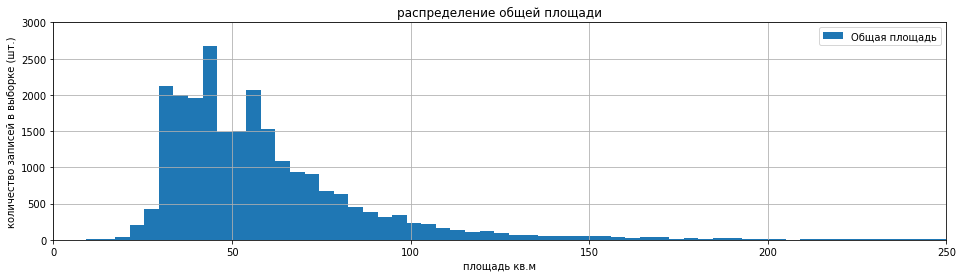

In [21]:
ax = df.plot(kind = 'hist', y = 'total_area', title = 'распределение общей площади', range = (5,250), bins = 60, grid=True, label = 'Общая площадь', figsize=(16,4))
ax.set(xlabel='площадь кв.м', ylabel='количество записей в выборке (шт.)')
plt.xlim(0, 250)  
plt.ylim(0, 3000) 
plt.show()

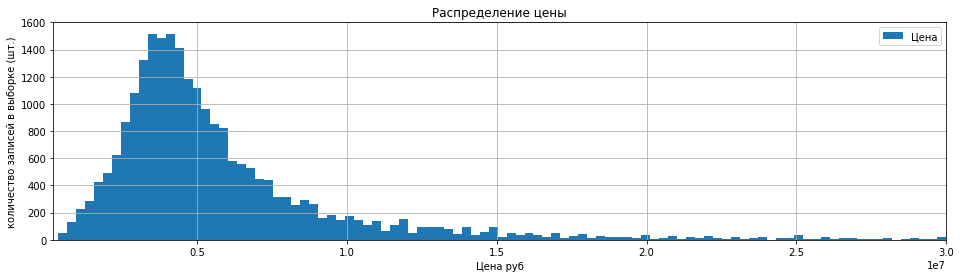

In [22]:
ax = df.plot(kind = 'hist',
             y = 'last_price',
             title = 'Распределение цены',
             bins = 100,
             grid=True,
             label = 'Цена', range = (50000,30000000),
             figsize=(16,4))
ax.set(xlabel='Цена руб', ylabel='количество записей в выборке (шт.)')
plt.xlim(200000, 30000000)  
plt.ylim(0, 1600) 
plt.show()

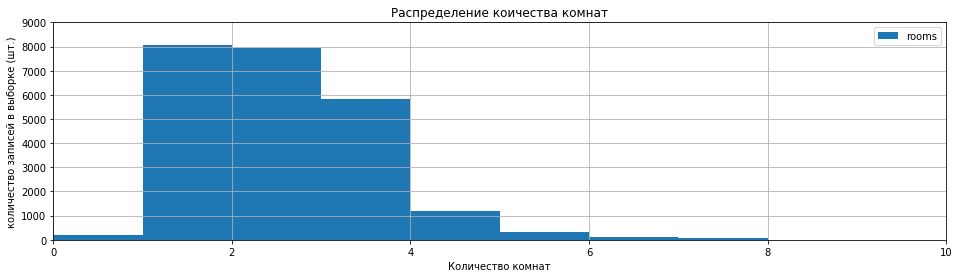

In [23]:
ax = df.plot(kind = 'hist',
             y = 'rooms',
             title = 'Распределение коичества комнат',
             bins = 10,
             grid=True,
             #label = 'Количество комнат',
             range = (0,10),
             figsize=(16,4))
ax.set(xlabel='Количество комнат', ylabel='количество записей в выборке (шт.)')
plt.xlim(0, 10)  
plt.ylim(0, 9000) 
plt.show()

[Text(0, 0.5, 'Количество записей в выборке (шт.)'),
 Text(0.5, 0, 'Высота потолка')]

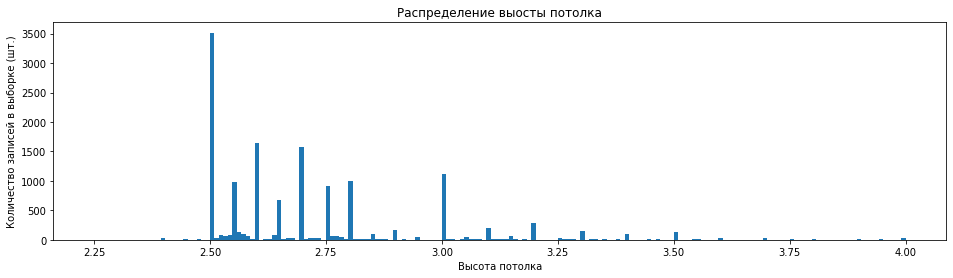

In [24]:
ax = df['ceiling_height_cutted'].round(2).plot(kind='hist',
                                               title = 'Распределение выосты потолка',
                                               bins = 182, 
                                               figsize = (16,4),
                                               range=(2.25,4))
ax.set(xlabel='Высота потолка', ylabel='Количество записей в выборке (шт.)')

### Время продажи квартиры

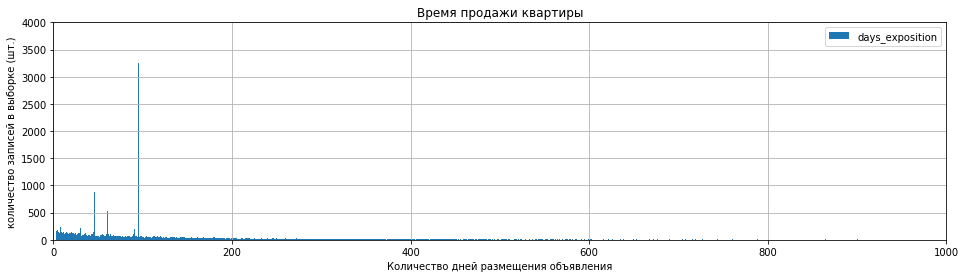

In [25]:
ax = df.plot(kind = 'hist',
             y = 'days_exposition',
             title = 'Время продажи квартиры',
             bins = 1000,
             grid=True,
             #label = 'Количество комнат',
             range = (0,1000),
             figsize=(16,4))
ax.set(xlabel='Количество дней размещения объявления', ylabel='количество записей в выборке (шт.)')
plt.xlim(0, 1000)  
plt.ylim(0, 4000) 
plt.show()

In [26]:
df['days_exposition'].describe(percentiles = [.05, .25, .5, .75, .95] )

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
5%          10.000000
25%         45.000000
50%         95.000000
75%        199.000000
95%        603.000000
max       1580.000000
Name: days_exposition, dtype: float64

Из данного описания можно сделать такие выводы:
- если квартиру купили за менее чем 10 дней , то будем считать что это очень быстро, это менее 5% от все продаж.
- если квартиру купили за 603 дня и более, то это уже достаточно долго, таких квартир тоже менее 5% от всех продаж.
- 50% всех квартир покупают в пределах примерно 3-х месяцев (95 дней)
- при этом средний срок продаж за счет очень редких и очень долгих продаж выше медианы больше чем в 1.5 раза (169 дней)
- нормальным сроком продажи можно считать, если срок лежит в пределах от 45 (25 процентиль) до 199 дней (75 процентиль) 

#### Уберем редкие выбивающиеся значения

##### Время продажи квартиры

In [27]:
df['days_exposition'].value_counts().head(7)

95    3245
45     880
60     538
7      234
30     208
90     204
4      176
Name: days_exposition, dtype: int64

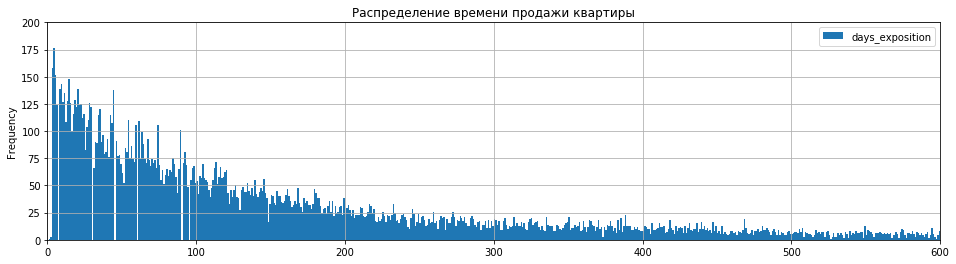

In [28]:
df[(~df['days_exposition'].isin([95,45,60,7,30, 90]))].plot(kind = 'hist',
                                                           y = 'days_exposition',
                                                           title = 'Распределение времени продажи квартиры',
                                                           bins = 1000,
                                                           grid=True,
                                                           #label = 'Количество комнат',
                                                           range = (0,1000),
                                                           figsize=(16,4))
ax.set(xlabel='Количество дней размещения объявления', ylabel='количество записей в выборке (шт.)')
plt.xlim(0, 600)  
plt.ylim(0, 200) 
plt.show()

In [29]:
print(df[~df['days_exposition'].isin([95,45,60,7,30, 90])]['days_exposition'].describe(percentiles = [.05, .25, .5, .75, .95] ))

count    18390.000000
mean       196.154160
std        227.076141
min          1.000000
5%          10.000000
25%         44.000000
50%        114.000000
75%        259.000000
95%        676.550000
max       1580.000000
Name: days_exposition, dtype: float64


Если отфильтровать редкие выбивающиеся значения, то получаетс такая картина:
- "это очень быстро" - все так же менее 10 дней.
- "достаточно долго" немного выросло до 676 дней
- 50% всех квартир стало ближе к 4-м месяцам (114 дней)
- "средний срок продаж"  за счет стал выше (196 дней)
- нормальным сроком продажи можно считать, если срок лежит в пределах от 44 (примерно так же ) до 259 дней (стало на 50 дней больше) 

какие-то очень ровные "редкие значения" (7, 30, 45, б0, 90 и, почему-то 95), похоже на какие-то автоматические действия системы.

##### Распределение площади квартир

In [30]:
df.loc[(df['total_area']>35) & (df['total_area']<65),'total_area'].value_counts().head(15)

45    763
44    697
42    657
43    561
36    557
40    549
60    534
46    514
38    508
41    493
50    485
55    431
57    427
54    426
37    425
Name: total_area, dtype: int64

**комменатрий** видно, что ряд идет не равномерно а с всплесками на значениях 45, 50, 55, 60. Значения опять же достаточно круглые, что наводит на мысль об округляниях (пользователями или системой). Уберем их.

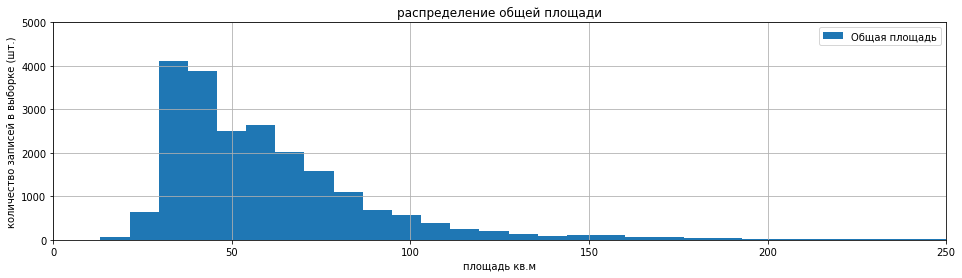

In [31]:
ax = df[~df['total_area'].isin([45,50,55,60])].plot(kind = 'hist', y = 'total_area', title = 'распределение общей площади', range = (5,250), bins = 30, grid=True, label = 'Общая площадь', figsize=(16,4))
ax.set(xlabel='площадь кв.м', ylabel='количество записей в выборке (шт.)')
plt.xlim(0, 250)  
plt.ylim(0, 5000) 
plt.show()

**комменатрий** видно что все еще выбиваются значения в районе 57, 58 м.кв. но если с окрглостью значний из списка 45,50,55,60 более менее понятно, то происхождение "выбросов" на 57,58 - не очевидно, и убирать их потому что "без них будет более красиво" считаю нецелесообразным. Поэтому оставим их. 

##### Распределение высоты потолков

При коруглении до 2-х значений после запятой, явно "выбивающихся" значений не наблюдается. Видно что существют "скомления" значений вокруг высот, округленных до дециметров. 

##### Распределение цены

Распределение цены выглядит наиболее ровным из всех рассмотренных. Корректировок не требуется. 

### Факторы, больше всего влияющие на стоимость квартиры

#### Зависимость цены от площади

[Text(0, 0.5, 'Медианное значение цены (руб)'),
 Text(0.5, 0, 'Площадь (м. кв.)')]

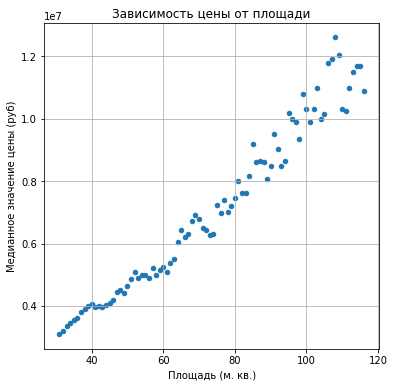

In [32]:
x = 'total_area' 
y = 'last_price'
condition_x_bottom = df[x] >= df[x].quantile(0.05)
condition_x_top = df[x]<= df[x].quantile(0.95)

condition_y_bottom = df[y] >= df[y].quantile(0.05)
condition_y_top = df[y]<= df[y].quantile(0.95)
filtered_data = df[(condition_x_bottom) & (condition_x_top) & (condition_y_bottom) & (condition_y_top)].copy()

ax = filtered_data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = 'median').reset_index().plot(
    kind = 'scatter',
    x ='total_area',
    y='last_price',
    grid=True,
    figsize=(6, 6),
    title = 'Зависимость цены от площади'
) 
ax.set(xlabel='Площадь (м. кв.)', ylabel= 'Медианное значение цены (руб)'  )                                                      

#### Зависимость цены от количества комнат

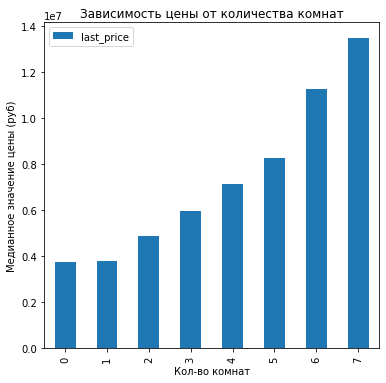

In [33]:
filtered_data
ax = filtered_data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median').plot(kind = 'bar', figsize=(6,6), title = 'Зависимость цены от количества комнат' )
ax.set(xlabel='Кол-во комнат', ylabel='Медианное значение цены (руб)')
plt.show()

#### Зависимость цены от удаленности от центра

In [34]:
def distance_cotegorizer(dist):
    if dist <= 2500:
        return 2.5
    if dist <= 5000:
        return 5
    if dist <=7500:
        return 7.5
    if dist <=10000:
        return 10
    if dist <=12500:
        return 12.5
    if dist <=15000:
        return 15
    if dist <=17500:
        return 17.5
    if dist <=20000:
        return 20
    if dist <=17500:
        return 17.5
    if dist <=20000:
        return 20
    if dist <=22500:
        return 22.5
    if dist <=25000:
        return 25
    if dist <=27500:
        return 27.5
    if dist <=30000:
        return 30
    if dist <=30000:
        return 30
    if dist <= 32500:
        return 32.5
    if dist <= 35000:
        return 35
    if dist <=37500:
        return 37.5
    if dist <=40000:
        return 40
    if dist <= 42500:
        return 42.5
    if dist <= 45000:
        return 45
    if dist <=47500:
        return 7.5
    if dist <=50000:
        return 50
    if dist <= 52500:
        return 52.5
    if dist <= 55000:
        return 55
    if dist <=57500:
        return 57.5
    if dist <=60000:
        return 60
    if dist <= 62500:
        return 62.5
    if dist <= 65000:
        return 65
    return 67.5
# добавим новый столбец в отфильтрованные данные и в исходные
df['cityCenters_nearest_cats'] = df['cityCenters_nearest'].apply(distance_cotegorizer)
filtered_data['cityCenters_nearest_cats'] = filtered_data['cityCenters_nearest'].apply(distance_cotegorizer)

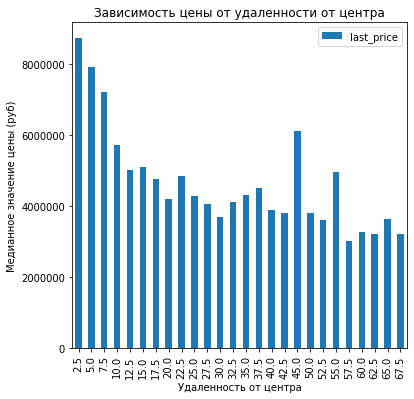

In [35]:
filtered_data
ax = filtered_data.pivot_table(index = 'cityCenters_nearest_cats', values = 'last_price', aggfunc = 'median').plot(kind = 'bar', figsize=(6,6), title = 'Зависимость цены от удаленности от центра' )
ax.set(xlabel='Удаленность от центра', ylabel='Медианное значение цены (руб)')
plt.show()

В целом виден тренд на уменьшение цены в зависимости от удаленности от центра. Но есть несколько вслесков. Наверное, это какие-то крупные областные города. Интересно на них посмотреть.

In [36]:
print('п.1. На расстоянии 45 км рсположены:', df[df['cityCenters_nearest_cats']==45]['locality_name'].unique().tolist())
print('п.2. На расстоянии 55 км рсположены:', df[df['cityCenters_nearest_cats']==55]['locality_name'].unique().tolist())
print('п.3. На расстоянии 22.5 км рсположены:', df[df['cityCenters_nearest_cats']==22.5]['locality_name'].unique().tolist())
print('п.4. На расстоянии 65 км рсположены:', df[df['cityCenters_nearest_cats']==65]['locality_name'].unique().tolist())

п.1. На расстоянии 45 км рсположены: ['посёлок Репино', 'Сестрорецк']
п.2. На расстоянии 55 км рсположены: ['Зеленогорск', 'Ломоносов']
п.3. На расстоянии 22.5 км рсположены: ['Санкт-Петербург', 'посёлок Парголово', 'посёлок Стрельна', 'поселок Мурино']
п.4. На расстоянии 65 км рсположены: ['посёлок Молодёжное', 'Зеленогорск']


А, ну конечно, 
1. корортный район на побережье Финского залива:  Репино и Сестрорецк
2. Тоже побережье да и города хорошие, зеленые
3. Хоть и ккраина Спб, но новостройки
4. Зеленогрск второй раз попал, видимо Молодежное входит в его административный состав Зеленогорска. кхм.. интересно из вики "В начале XX века в деревне возникло огромное количество дач богатых петербуржцев. За красоту местности они называли эти края «Финляндской Ривьерой»"

В общем тут вывод такой: расстояние от центра в целом влияет, но есть обоснованные исключения.

### Зависимость цены от того, на каком этаже расположена квартира

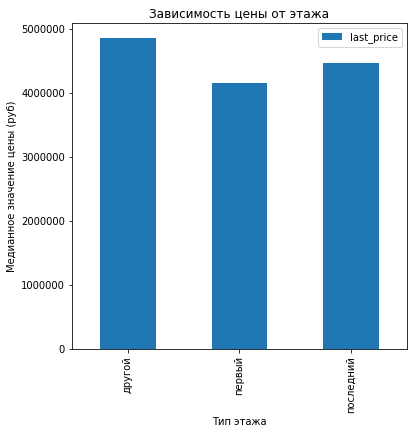

In [37]:
ax = filtered_data.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = 'median').plot(kind = 'bar', figsize=(6,6), title = 'Зависимость цены от этажа' )
ax.set(xlabel='Тип этажа', ylabel='Медианное значение цены (руб)')
plt.show()

Таки да, не первый и не последний в целом дороже

### Зависимость цены от того, на каком этаже расположена квартира

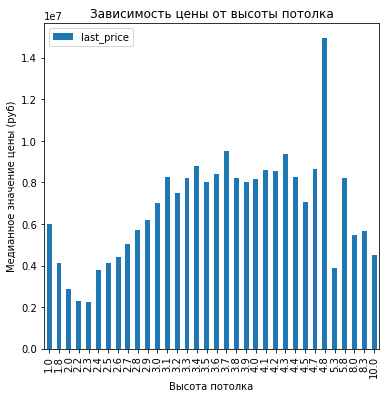

In [38]:
filtered_data['ceiling_height_cutted_round'] = filtered_data['ceiling_height_cutted'].round(1)
ax = filtered_data.pivot_table(index = 'ceiling_height_cutted_round', values ='last_price', aggfunc = 'median').\
plot(kind = 'bar', figsize=(6,6), title = 'Зависимость цены от высоты потолка' )
ax.set(xlabel='Высота потолка', ylabel='Медианное значение цены (руб)')
plt.show()

1. странная история с потолками 2 м и ниже. Видимо неверные значения были введены. Минимум явно виден на высоте 2.3, 2.4 м
2. Далее видно что есть рост до 3.7, а потом начинается спад. Похоже что после 4.3. сильно старый фонд
3. интересно было бы посмотреть на квартиры с потолками от 5 м и почему все же там цена наичнает снижаться.

### Зависимость цены от дня недели размещения

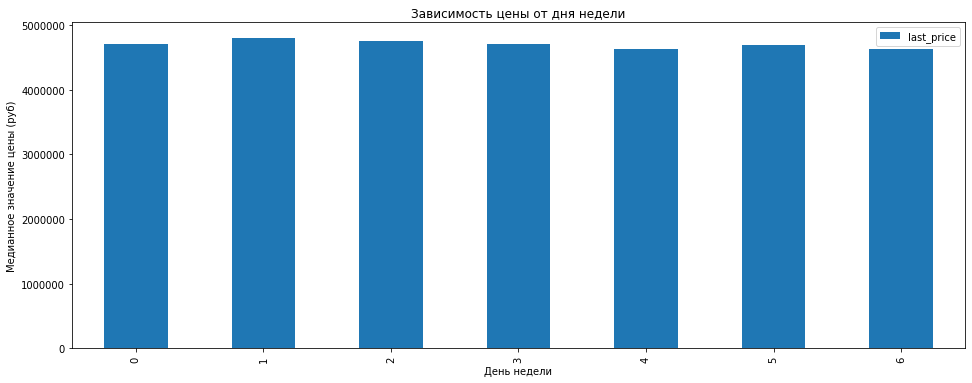

In [39]:
ax = filtered_data.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = 'median').plot(kind = 'bar', figsize=(16,6), title = 'Зависимость цены от дня недели' )
ax.set(xlabel='День недели', ylabel='Медианное значение цены (руб)')
plt.show()

выглядит, как будто во вторник люди склонные ставить цену выше чем в пятницу. Но это надо проверять через доверительные интервалы.

### Зависимость цены от месяца размещения

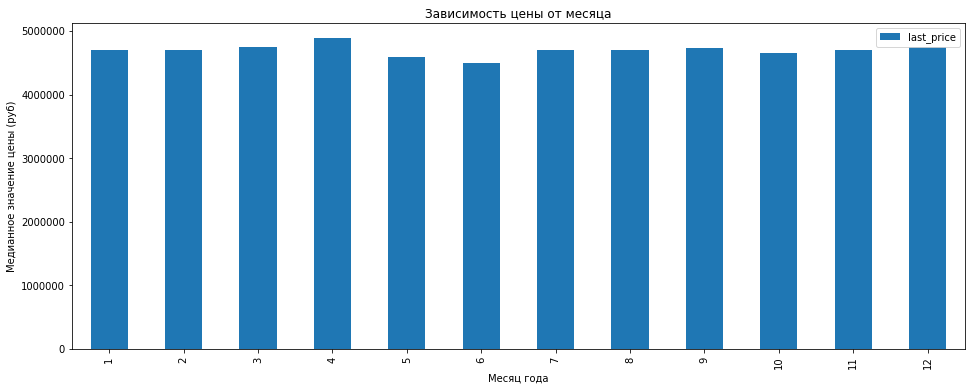

In [40]:
ax = filtered_data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = 'median').plot(kind = 'bar', figsize=(16,6), title = 'Зависимость цены от месяца' )
ax.set(xlabel='Месяц года', ylabel='Медианное значение цены (руб)')
plt.show()

В апреле люди склонны ставить цену выше, а в июне ниже, но опять же надо проверять статистически.

### Зависимость цены от года размещения

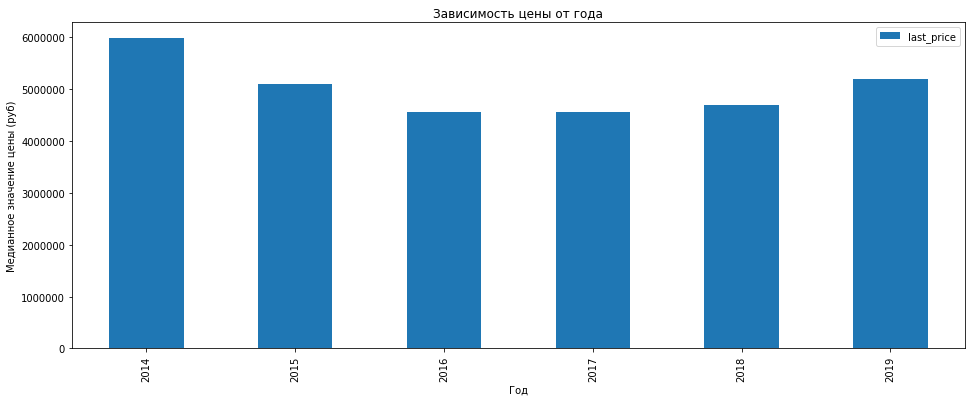

In [41]:
ax = filtered_data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = 'median').plot(kind = 'bar', figsize=(16,6), title = 'Зависимость цены от года' )
ax.set(xlabel='Год', ylabel='Медианное значение цены (руб)')
plt.show()

Похоже что, два года после кризиса  цена снижалась. А в 2019 кажется ставка на ипотеку упала. "Заяндексим" .. "В декабре 2019 года ипотечная ставка по выданным кредитам впервые в истории опустилась ниже 9% годовых. Власти ожидают, что ипотека под 8% станет доступной еще до 2024 года." .. интересно а как она менялась в пределах самого 2019 года

### Изменение цены в течение 2019 года

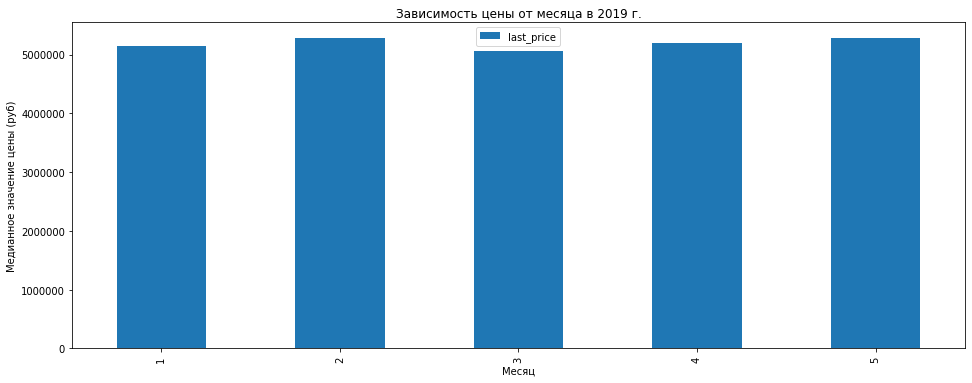

In [42]:
ax = filtered_data[filtered_data['year_exposition']==2019].pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = 'median').plot(kind = 'bar', figsize=(16,6), title = 'Зависимость цены от месяца в 2019 г.' )
ax.set(xlabel='Месяц', ylabel='Медианное значение цены (руб)')
plt.show()

Странно, но как есть. А есть так, что для 2019 явно данные не полны.

In [43]:
filtered_data[['last_price', 'square_meter_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,square_meter_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.642358,0.722903,0.430675,-0.360547
square_meter_price,0.642358,1.000000,-0.025567,-0.214397,-0.401464
total_area,0.722903,-0.025567,1.000000,0.784191,-0.164189
rooms,0.430675,-0.214397,0.784191,1.000000,-0.093347
cityCenters_nearest,-0.360547,-0.401464,-0.164189,-0.093347,1.000000


**выводы по рассчету коррееляции**
прослеживается наиболее высокая корреляция для следующих пар:
- rooms - total_area (что логично. чем больше комнат, тем больше площадь)
- total_area - last_price (что опять же логично. чем больше площадь, тем больше стоимость)
- square_meter_price - last_price (тут корреляцию еще можно считать высокой но уже где-то на пороге. "чем выше цена за кадратный метр, тем выше цена", вроде логично, но очевидно что цена квадратного метра может быть высокой, а площадь маленькой, тогда цена квартиры будет не так сильно коррелироваться с ценой квадратного метра. С другой стороны для элитного жилья или квартир в центре цена квадратного метра высокая и как не крути цена тоже. так что спорный параметр, но, как будто) рабочий.
- rooms - last_price - корреляция очень средняя.

остальные параметры скоррелированы слабо.



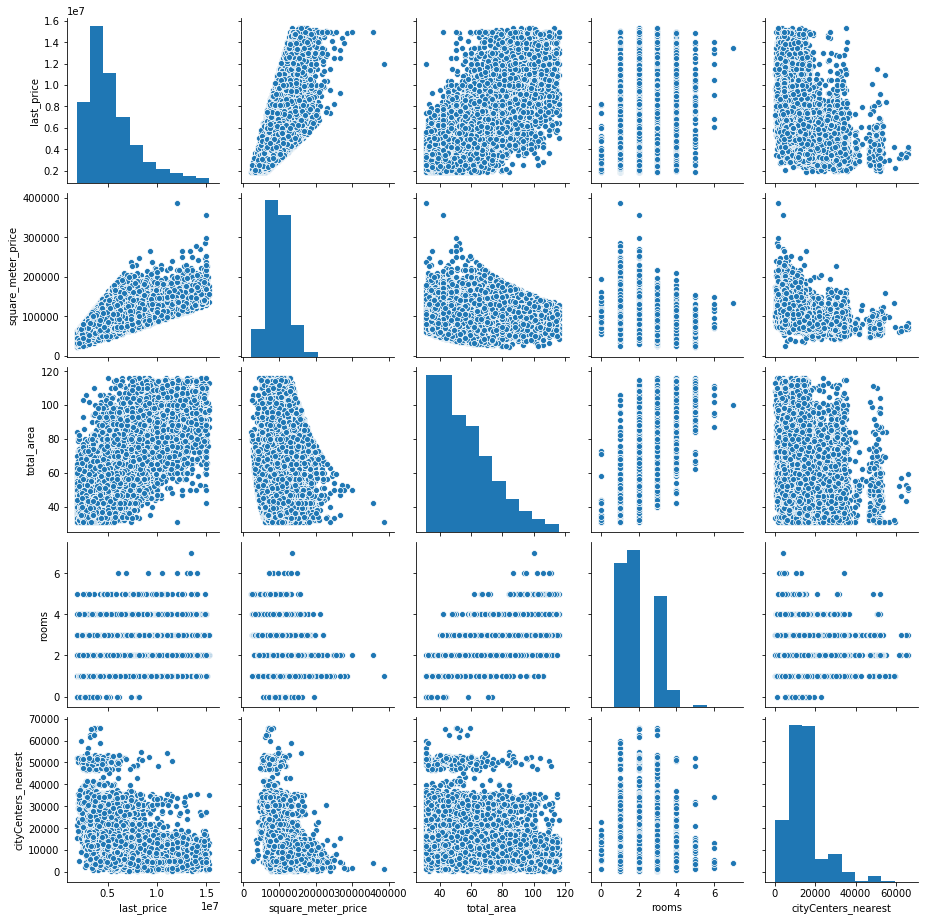

In [44]:
sns.pairplot(filtered_data[['last_price', 'square_meter_price', 'total_area', 'rooms', 'cityCenters_nearest']])

**выводы по визуализации коррееляции**
- rooms - total_area - корреляция по графику видна, но без Пирсона я бы не сказал, что она максимальная из всех.
- total_area - last_price - по данной диаграмме вообще видно "месиво" точек. Луше бы использовать 'hexbin' для визуализации, но у нас есть коэффициент пирсона. ему верим, дополнительно не визуализируем.
- square_meter_price - last_price  - судя по визуализации я бы сказал что тут наиболее заметна корреляци. 
- rooms - last_price - как и по расчету "Пирсона" визуально корреляция очень средняя.

**что видно еще:**
- на большом удалении от центра высокой цены за м.кв. не бывает. (см. cityCenters_nearest - square_meter_price)
- похожая ситуация и с зависимостью cityCenters_nearest - last_price 

но зависимость тут линейной не назовешь.

## 10 населённых пунктов с наибольшим числом объявлений

In [45]:
topdf = df.copy() # создадим копию df новый датафрейм
top_cities = topdf['locality_name'].value_counts().head(10).index.tolist() # сожадим топ-10 список населенных пунктов
print('топ-10 список населенных пунктов:', top_cities)

топ-10 список населенных пунктов: ['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск', 'Пушкин', 'Колпино', 'посёлок Парголово', 'Гатчина', 'деревня Кудрово', 'Выборг']


In [46]:
topdf = topdf[topdf['locality_name'].isin(top_cities)] # сделаем срез в новом датафрейме по полученному списку топ-10 городов
print('для проверки выведем уникальные значения населенных пунктов в полученном датафрейме.',topdf['locality_name'].unique().tolist())

для проверки выведем уникальные значения населенных пунктов в полученном датафрейме. ['Санкт-Петербург', 'посёлок Шушары', 'посёлок Парголово', 'посёлок Мурино', 'Пушкин', 'деревня Кудрово', 'Колпино', 'Гатчина', 'Выборг', 'Всеволожск']


In [47]:
topdf.groupby('locality_name')['square_meter_price'].mean().sort_values(ascending = False)

locality_name
Санкт-Петербург      115283.411956
Пушкин               103611.362825
деревня Кудрово       93002.173472
посёлок Парголово     90675.627757
посёлок Мурино        86379.968978
посёлок Шушары        79068.602928
Колпино               75735.589833
Гатчина               69045.519030
Всеволожск            68985.235455
Выборг                58296.119480
Name: square_meter_price, dtype: float64

Среди топ-10 по количеству объявлений населенных пунктов самая высокая стоимость жилья, ожидаемо, в СПб, а самая низкая, что вполне логично, - в Выборге (самый отдаленный из самых крупных городов ЛО)

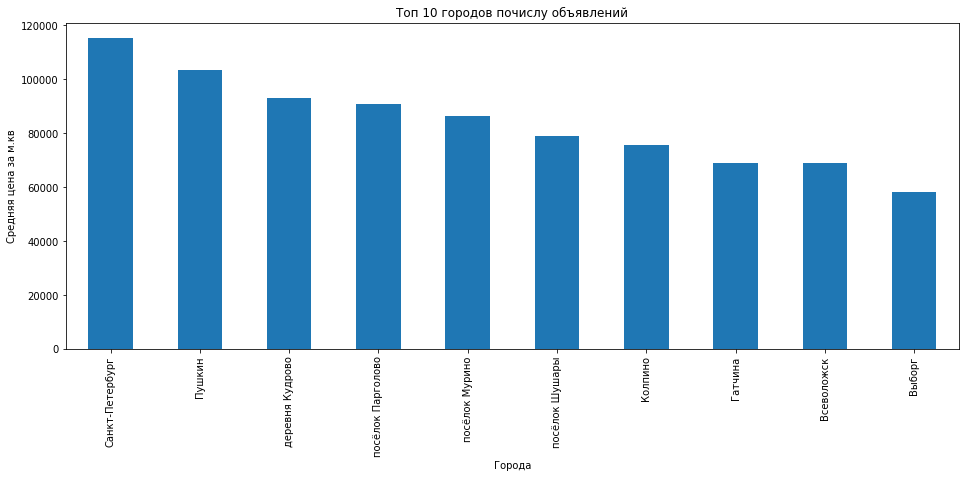

In [48]:
ax = topdf.groupby('locality_name')['square_meter_price'].mean().sort_values(ascending = False).plot(kind='bar', figsize=(16,6), title = 'Средняя цена в Топ-10 городов почислу объявлений')
ax.set(xlabel = 'Города', ylabel = 'Средняя цена за м.кв')
plt.show()

### Предложения квартир в Центре

Для данного задания выполим расчет двумя способами
1. с применением ранее подготовленного столбца категорий расстояний (с шагом по 2.5 км)
2. как требуется в задании и посмотрим как нагляднее

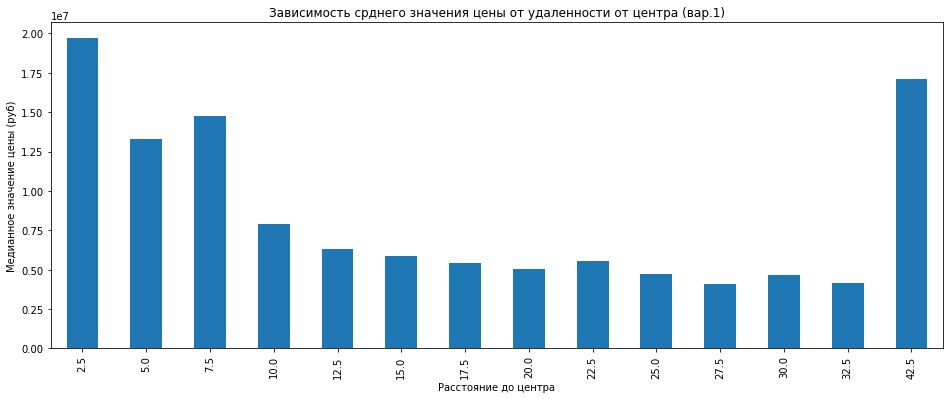

Wall time: 226 ms


In [49]:
ax = df.loc[df['locality_name']=='Санкт-Петербург'].groupby('cityCenters_nearest_cats')['last_price'].mean()\
.plot(kind='bar', x = 'cityCenters_nearest_cats', y = 'last_price', figsize= (16,6))
ax.set(xlabel='Расстояние до центра', ylabel='Медианное значение цены (руб)', title = 'Зависимость срднего значения цены от удаленности от центра (вар.1)')
plt.show()

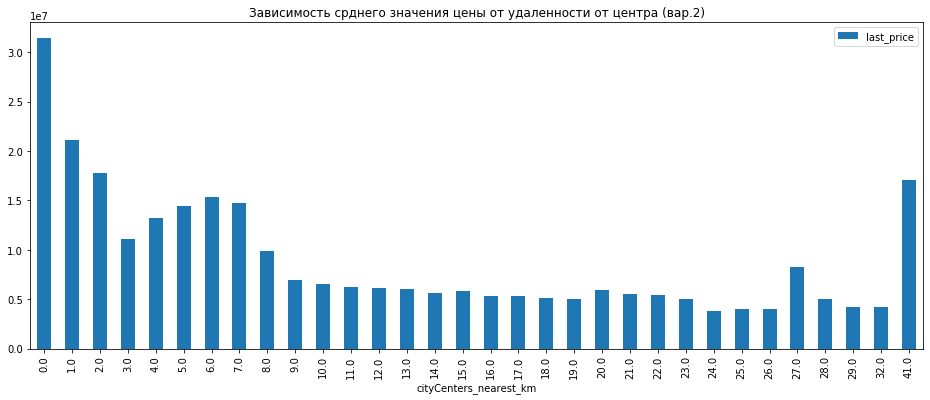

In [50]:
df['cityCenters_nearest_km'] = df['cityCenters_nearest'] /1000
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].round()
df.loc[df['locality_name']=='Санкт-Петербург'].pivot_table(index = 'cityCenters_nearest_km', values = 'last_price' ).reset_index()\
.plot(kind='bar', x = 'cityCenters_nearest_km', y = 'last_price', figsize= (16,6), title = 'Зависимость срднего значения цены от удаленности от центра (вар.2)')
#ax.set(xlabel='Расстояние до центра', ylabel='Медианное значение цены (руб)')
#plt.show()

- Вывод: Центр города заканчивается в 7.5 км от (видимо) Дворцовой площади
- Комментарий: Результат в обоих случаях одинкаовый, но в первом варианте, при использовании более грубого шага получилось чуть более наглядно.

### Анализ влияния на цену числа комнат, этажа, удалённости от центра, даты размещения объявления.

#### Зависимость цены от площади

In [63]:
#Воспользуемся существющим кодом, но добавим к нему еще одно условие: расстояние до центра - не более 7 км
x = 'total_area' 
y = 'last_price'
condition_x_bottom = df[x] >= df[x].quantile(0.05)
condition_x_top = df[x]<= df[x].quantile(0.95)

condition_y_bottom = df[y] >= df[y].quantile(0.05)
condition_y_top = df[y]<= df[y].quantile(0.95)

additional_condition = df['cityCenters_nearest_km']<= 7

# добавим его в фильтр
filtered_data = df[(condition_x_bottom) & (condition_x_top) & (condition_y_bottom) & (condition_y_top) & (additional_condition)].copy()

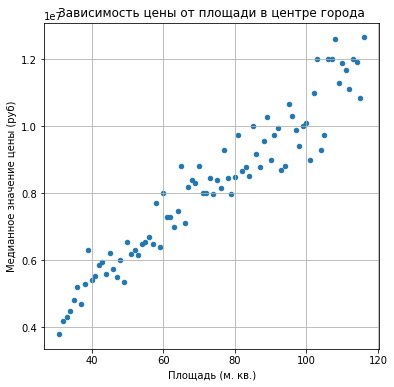

In [64]:
ax = filtered_data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = 'median').reset_index().plot(
    kind = 'scatter',
    x ='total_area',
    y='last_price',
    grid=True,
    figsize=(6, 6),
    title = 'Зависимость цены от площади в центре города'
) 
ax.set(xlabel='Площадь (м. кв.)', ylabel= 'Медианное значение цены (руб)'  )   
plt.show()

In [52]:
filtered_data['locality_name'].unique()

array(['Санкт-Петербург'], dtype=object)

вывод: зависимость сохраняется. Коэффициент зависимости больше. цена от площади быстрее растет.

#### Зависимость цены от количества комнат

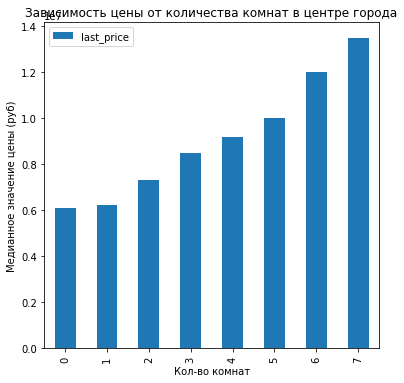

In [53]:
ax = filtered_data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median').plot(kind = 'bar', figsize=(6,6), title = 'Зависимость цены от количества комнат в центре города' )
ax.set(xlabel='Кол-во комнат', ylabel='Медианное значение цены (руб)')
plt.show()

вывод: зависимость от числа комнат сохраняется, но начало графика на 2 млн выше. 

#### Зависимость цены от удаленности от центра

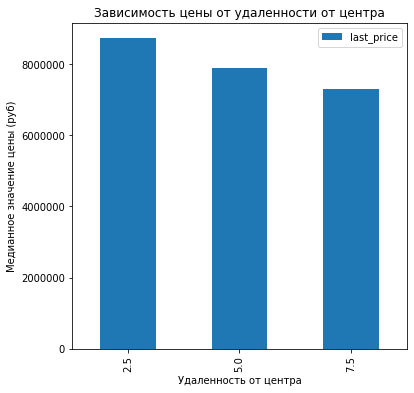

In [54]:
ax = filtered_data.pivot_table(index = 'cityCenters_nearest_cats', values = 'last_price', aggfunc = 'median').plot(kind = 'bar', figsize=(6,6), title = 'Зависимость цены от удаленности от центра' )
ax.set(xlabel='Удаленность от центра', ylabel='Медианное значение цены (руб)')
plt.show()

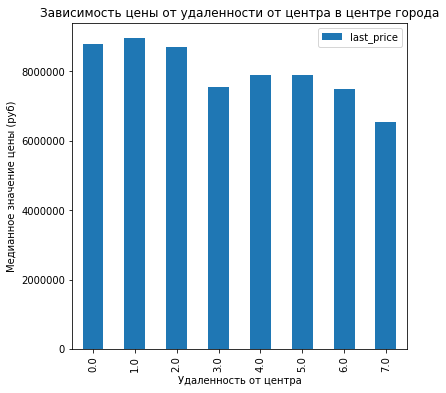

In [65]:
ax = filtered_data.pivot_table(index = 'cityCenters_nearest_km', values = 'last_price', aggfunc = 'median').plot(kind = 'bar', figsize=(6,6), title = 'Зависимость цены от удаленности от центра в центре города' )
ax.set(xlabel='Удаленность от центра', ylabel='Медианное значение цены (руб)')
plt.show()

вывод: в зависимости от удаления от центра стоимость так же падает. 

### Зависимость цены от того, на каком этаже расположена квартира

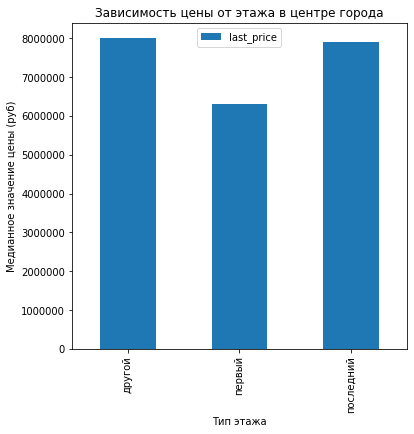

In [56]:
ax = filtered_data.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = 'median').plot(kind = 'bar', figsize=(6,6), title = 'Зависимость цены от этажа в центре города' )
ax.set(xlabel='Тип этажа', ylabel='Медианное значение цены (руб)')
plt.show()

Вывод: В центре последний стоит примерно так же как как и другие, что странно, т.к. крыши в центре текут чаще

### Зависимость цены от того, на каком этаже расположена квартира

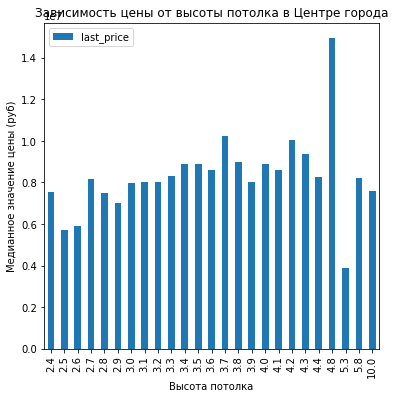

In [57]:
filtered_data['ceiling_height_cutted_round'] = filtered_data['ceiling_height_cutted'].round(1)
ax = filtered_data.pivot_table(index = 'ceiling_height_cutted_round', values ='last_price', aggfunc = 'median').\
plot(kind = 'bar', figsize=(6,6), title = 'Зависимость цены от высоты потолка в Центре города' )
ax.set(xlabel='Высота потолка', ylabel='Медианное значение цены (руб)')
plt.show()

Картина несколько изменилась:
1. в районе высоты окло 4 м - цена примерно такая же - 8 млн.
2. влияние высоты не так сисильно выражено, разве что 2.5, 2.6 м немного проседают. 
3. заметен пик на высоте 2.4 м - возможно это какие- то новые дома, необходимо уточнить у экспертов
4. ниже 2.4 потолки не встречаются 

### Зависимость цены от того дня недели размещения

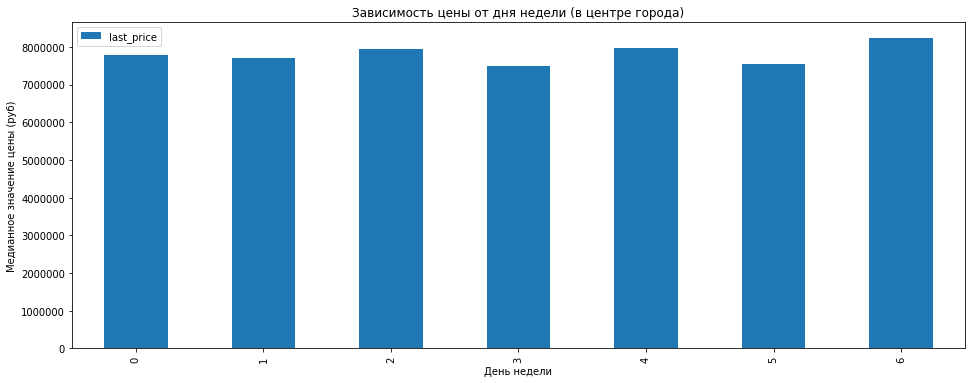

In [58]:
ax = filtered_data.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = 'median').plot(kind = 'bar', figsize=(16,6), title = 'Зависимость цены от дня недели (в центре города)' )
ax.set(xlabel='День недели', ylabel='Медианное значение цены (руб)')
plt.show()

а тут выглядит, как будто не во вторник, а в воскресенье люди склонны ставить цену выше чем .. теперь уже не в пятницу, а в четверг. В общем дни немного поменялись... как юудто-бы.  Но опять же - это надо проверять через доверительные интервалы.

### Зависимость цены от месяца размещения

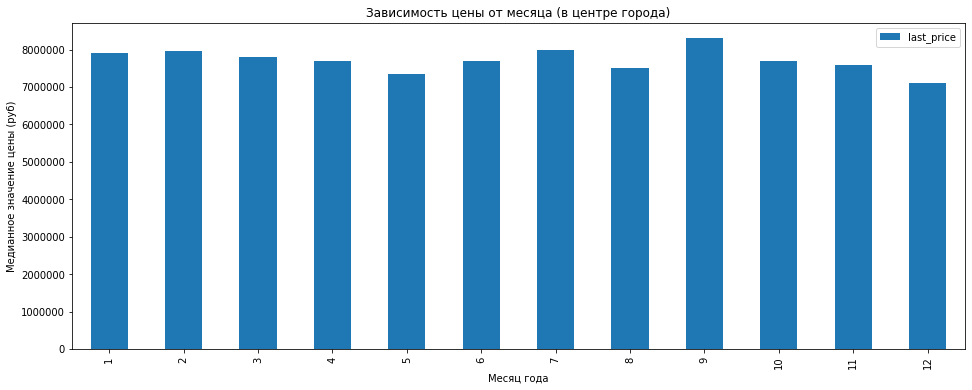

In [59]:
ax = filtered_data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = 'median').plot(kind = 'bar', figsize=(16,6), title = 'Зависимость цены от месяца (в центре города)' )
ax.set(xlabel='Месяц года', ylabel='Медианное значение цены (руб)')
plt.show()

В центре  люди склонны ставить цену выше не в апреле, а в сентябре. Самая низкая цена - в мае. (опять же предварительно, без статистики)

### Зависимость цены от года размещения

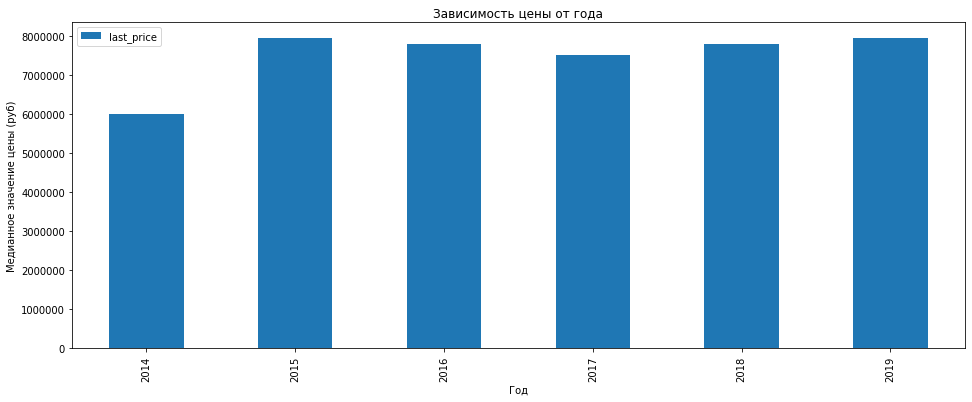

In [60]:
ax = filtered_data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = 'median').plot(kind = 'bar', figsize=(16,6), title = 'Зависимость цены от года' )
ax.set(xlabel='Год', ylabel='Медианное значение цены (руб)')
plt.show()

вывод: в 2014-м был цены в центре просели, а потом снова выросли и не особо менялись

In [69]:
filtered_data[['last_price', 'square_meter_price', 'total_area', 'rooms', 'cityCenters_nearest_km']].corr()

,last_price,square_meter_price,total_area,rooms,cityCenters_nearest_km
last_price,1.000000,0.445296,0.667044,0.384324,-0.141347
square_meter_price,0.445296,1.000000,-0.333267,-0.420215,0.024913
total_area,0.667044,-0.333267,1.000000,0.764234,-0.186768
rooms,0.384324,-0.420215,0.764234,1.000000,-0.173316
cityCenters_nearest_km,-0.141347,0.024913,-0.186768,-0.173316,1.000000


**выводы по рассчету коррееляции**
топ параметров по скоррелированности остается прежним:

|пара|было|стало|
|-------|------|------|
|rooms - total_area|0.784|0.764|
|total_area - last_price|0.722| 0.667|
|square_meter_price - last_price|0.642|0.445|
|rooms - last_price|0.430|0.384|

но замечается падение скоррлированности параметров на 0.02-0.2

## Общий вывод

В рамках данного проекта была проведена следующая работа:
1. Проведена предподготовка исходных данных, где пропуски не имеют смысла проведено их заполнение с учетом медианных показетелей по данному населенному пункту. В целом данный подход оказался избыточным, т.к. параметры 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest' и т.п. в дальнейших рассчетах не участвовали. С другой стороны заполнение медианой пропусков в'cityCenters_nearest'для Санкт-Петерубрга могло сгладить графики.
2. Добавлены дополнительные параметры
3. Проведена предварительная оценка влияния на стоимость для всей выбокри и только для Сантк-Петербурга таких параметров как:
    1. площадь
    2. этаж
    3. число комнат
    4. высота потолков
4. По полученным графикам заметно что площадь влияет линейно и наиболее сильно (ожидаемо)
5. Другие параметры имеют более сложную форму распределения, в некоторых случаях обяснимую (например Удаленность от центра города с локальными максимума в Курортном районе) но в некоторых требующую дополнительных комментариев или очистки данных (например высота потолков)
6. В центре города и по всем городам ЛЕнинградской области продажи шли по разному.Предварительно выглядит как будто на продажи в центре города меньше влияет стагнация экономики
7. Так же заметна разница в активности продаж в центре и без учета географии по месяца.
8. В идеале данные исследования лучше провести по срезам "только в СПб" и "везде, кроме СПб", вероятно картина была бы более наглядной. (но в задании этого нет, а сосроком сдачи и так затянул, поэтому пропустим это)
9. Параметр "Время продажи квартиры" вероятно имеет некоторую зашумелнность, а гистограмма при том что медиана = 114, но максимум заметен в районе 5-10 дней.

**Дополнительные выводы**

средняя цена квартир по Ленинградской области и СПб:  6.540.000 р. при медиане в 4.500.000 р.
половина всех цен лежит в диапазоне от 3.400.000 (25 процентиль) до 6.800.000 (75 процентиль)
высокая линейная скорелированность с ценой прослеживается для параметров

- площадь
- количества комнат 
- удаленности от центра (за исключением дорогих районов за городом)

нелинейная зависимость присутствует для высоты потолка

на цену влияеют так же
1. находится ли на первом этаже
2. год, но для разных районов по разному

средняя цена за м.кв для топ-10 городов лежит в диапазоне от 65000 до 115000